In [1]:

# Credit Risk Modeling is a process used by financial institutions to assess and manage the risk of 
# potential losses due to the default of borrowers or counterparties. It involves using statistical 
# and mathematical techniques to quantify the likelihood and severity of credit-related events. 


# Probability of Default is the likelihood, or chance, that a borrower will default on their financial 
# obligations (e.g., fail to repay a loan) within a specified period.

# Example: If a borrower has a PD of 5%, it means there is a 5% chance they will default on their loan.


# Exposure at Default represents the potential loss an institution could face if a borrower defaults. 
# It is the estimated amount that is at risk.

# Example: If a borrower has a loan amount of $10,000, the EAD is $10,000.


# Loss Given Default is the proportion of the exposure that will be lost in the event of default. 
# It indicates the severity of the potential loss.

# Example: If the LGD is 20%, it means that in the event of default, the institution expects to 
# lose 20% of the capital exposed.


# Expected Loss is the anticipated loss on a particular loan, taking into account both the probability 
# of default and the potential severity of loss given default. It is a measure of the average expected loss.

# Example: If a borrower has a PD of 5%, an EAD of $10,000, and an LGD of 20%, the expected loss 
# would be 5% * 20% * $10,000 = $100.


In [3]:

# Incorporating features of historical data, includinh industry benchmarks and other relevant portfolio 
# characteristics, can enhance the realism of your LGD estimation. I don't have access to these actual
# features, so I'll simulating them in this illustration. You can easily import your specific features
# into the example below.


import pandas as pd
import numpy as np
import scipy.stats as stats
pd.set_option('display.max_columns', None)


# Create a DataFrame with credit_score and loan_amount columns
data = {
    'credit_score': np.random.normal(700, 50, 1000),
    'loan_amount': np.random.uniform(5000, 50000, 1000),
    'historical_data_factor': np.random.normal(1.0, 0.1, 1000),  # Assume a factor based on historical data
    'industry_benchmark_factor': np.random.normal(1.0, 0.05, 1000),  # Assume a factor based on industry benchmarks
    'portfolio_characteristic_factor': np.random.normal(1.0, 0.08, 1000)  # Assume a factor based on portfolio characteristics
}

df = pd.DataFrame(data)

# Probability of Default (PD) calculation
def calculate_pd(credit_score):
    z_score = (credit_score - 700) / 50  # Assuming a normal distribution with mean=700, std=50
    pd = 1 - stats.norm.cdf(z_score)
    return pd

# Exposure at Default (EAD) calculation
def calculate_ead(loan_amount):
    ead = loan_amount
    return ead

# Realistic LGD calculation based on multiple factors
def calculate_realistic_lgd(row):
    lgd_mean = 0.20  # Assume a mean LGD of 20%
    lgd_std_dev = 0.05  # Assume a standard deviation of 5%
    
    # Combine factors to derive LGD
    lgd_factors = [
        row['historical_data_factor'],
        row['industry_benchmark_factor'],
        row['portfolio_characteristic_factor']
    ]
    
    lgd_combined_factor = np.prod(lgd_factors)
    lgd = np.random.normal(lgd_mean * lgd_combined_factor, lgd_std_dev)
    
    # Ensure LGD is within a realistic range (e.g., between 5% and 40%)
    lgd = np.clip(lgd, 0.05, 0.40)
    
    return lgd

# Calculate PD, EAD, and LGD for each observation in the DataFrame
df['pd'] = calculate_pd(df['credit_score'])
df['ead'] = calculate_ead(df['loan_amount'])
df['lgd'] = df.apply(lambda row: calculate_realistic_lgd(row), axis=1)

# Calculate Expected Loss (EL)
df['el'] = df['pd'] * df['lgd'] * df['ead']

# Display the DataFrame with calculated values
print(df.head())


   credit_score   loan_amount  historical_data_factor  \
0    714.272801  17897.768890                0.849475   
1    703.239343  39803.392731                1.101655   
2    611.224771  11493.341416                0.950137   
3    647.291368  13420.917667                0.923242   
4    777.942302  20922.997663                0.991665   

   industry_benchmark_factor  portfolio_characteristic_factor        pd  \
0                   1.076606                         1.099557  0.387647   
1                   0.926453                         0.898133  0.474172   
2                   0.940701                         0.990999  0.962093   
3                   0.944677                         0.874142  0.854098   
4                   1.026711                         0.980225  0.059516   

            ead       lgd           el  
0  17897.768890  0.180273  1250.738751  
1  39803.392731  0.224043  4228.516371  
2  11493.341416  0.170793  1888.566863  
3  13420.917667  0.147490  1690.647385  
4

In [ ]:

# These metrics are crucial in credit risk management for assessing and quantifying the potential 
# risks associated with lending or investment portfolios. They help financial institutions make 
# informed decisions about risk mitigation, pricing, and capital allocation.


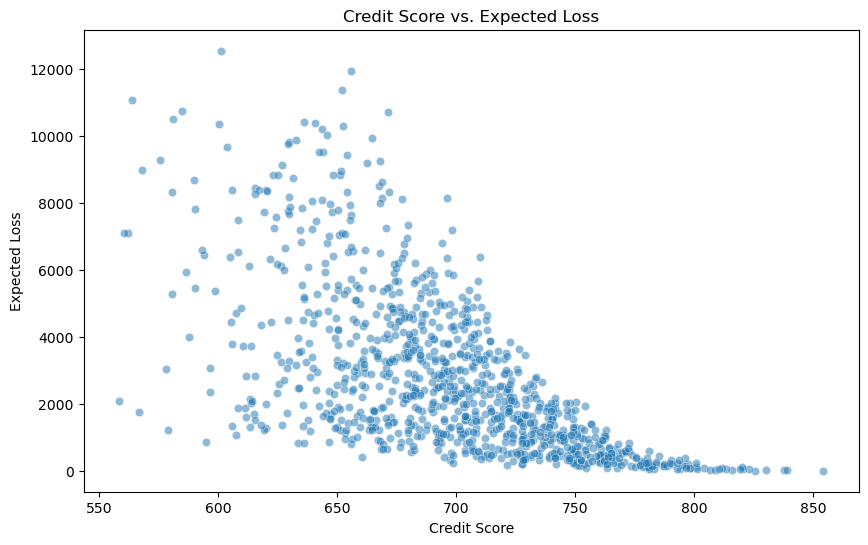

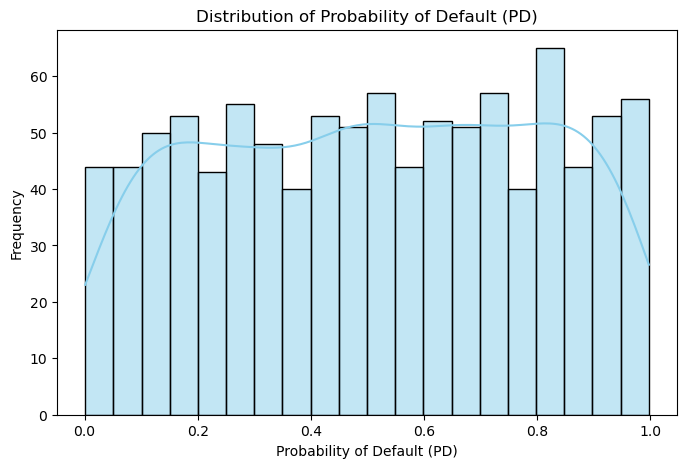

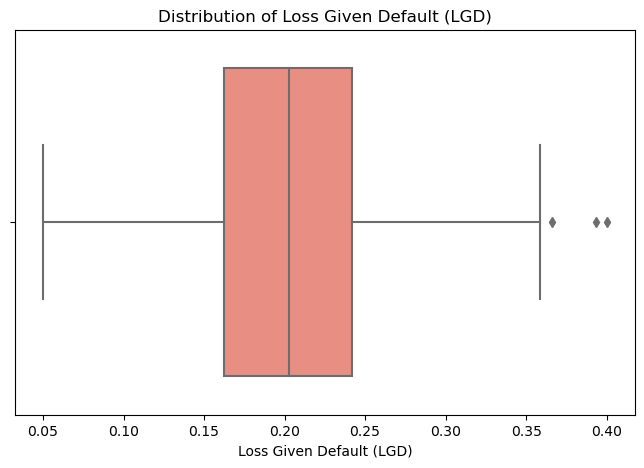

C:\Users\ryan_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


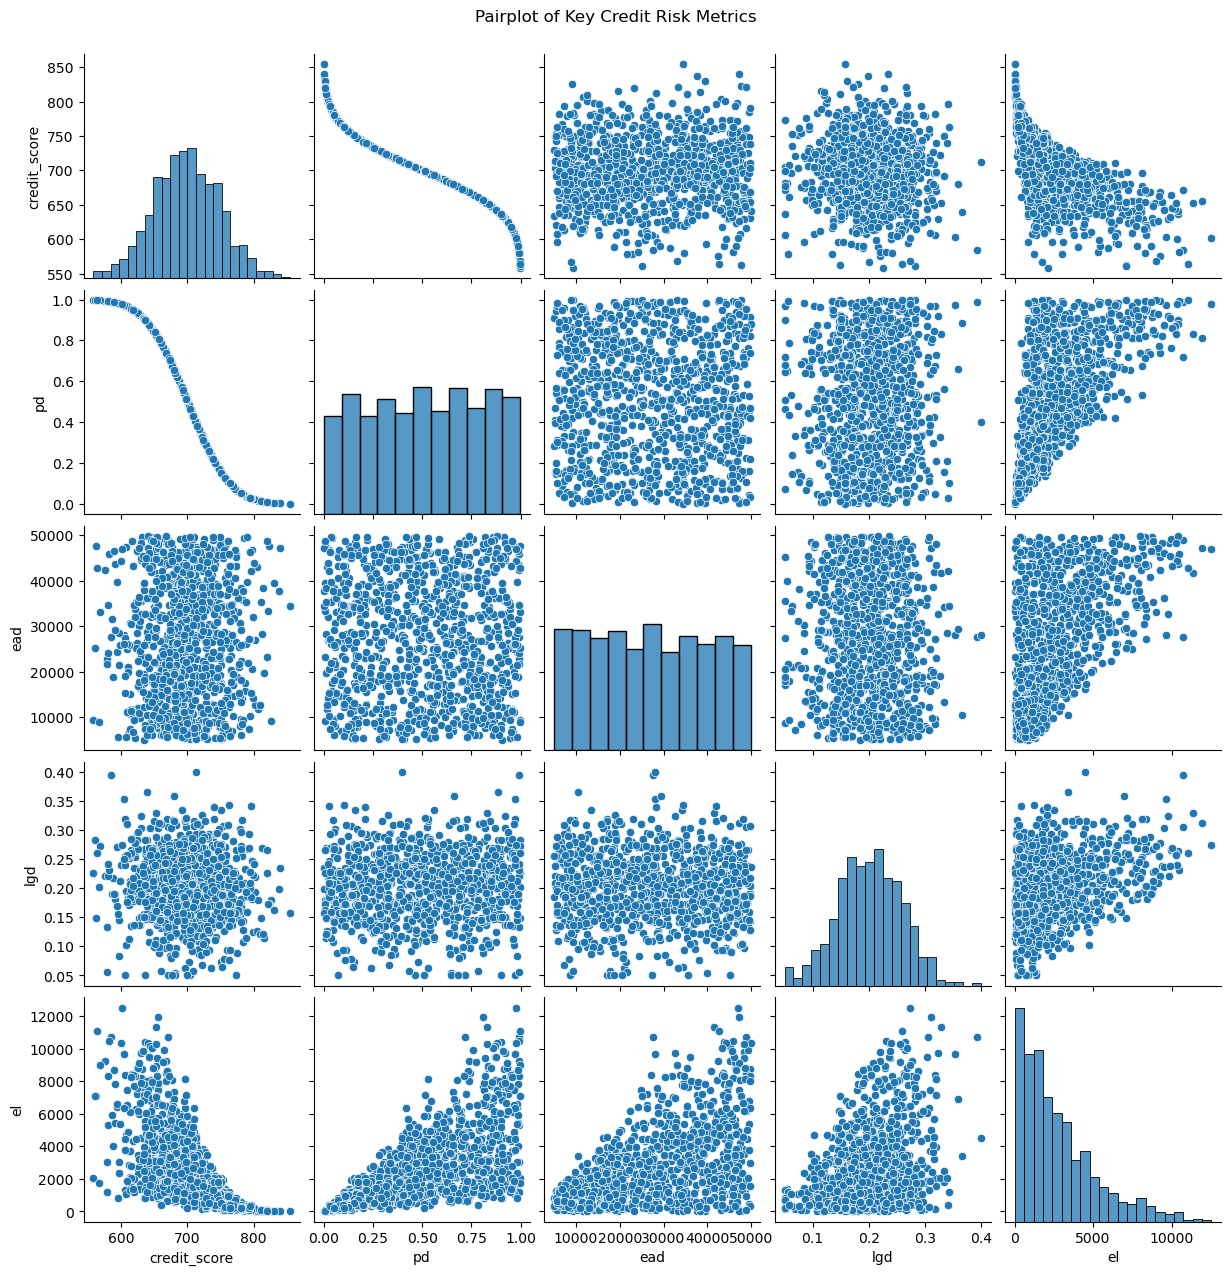

In [4]:


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Credit Score vs. Expected Loss (EL)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_score', y='el', data=df, alpha=0.5)
plt.title('Credit Score vs. Expected Loss')
plt.xlabel('Credit Score')
plt.ylabel('Expected Loss')
plt.show()


# Distribution of Probability of Default (PD)
plt.figure(figsize=(8, 5))
sns.histplot(df['pd'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Probability of Default (PD)')
plt.xlabel('Probability of Default (PD)')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Loss Given Default (LGD)
plt.figure(figsize=(8, 5))
sns.boxplot(x='lgd', data=df, color='salmon')
plt.title('Distribution of Loss Given Default (LGD)')
plt.xlabel('Loss Given Default (LGD)')
plt.show()


# Pairplot for key metrics
sns.pairplot(df[['credit_score', 'pd', 'ead', 'lgd', 'el']])
plt.suptitle('Pairplot of Key Credit Risk Metrics', y=1.02)
plt.show()


In [5]:

# Here is one more example of Credit Risk Modeling using Random Forest Regression.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Create a DataFrame with credit_score and loan_amount columns
data = {
    'credit_score': np.random.normal(700, 50, 1000),
    'loan_amount': np.random.uniform(5000, 50000, 1000),
    'historical_data_factor': np.random.normal(1.0, 0.1, 1000),  # Assume a factor based on historical data
    'industry_benchmark_factor': np.random.normal(1.0, 0.05, 1000),  # Assume a factor based on industry benchmarks
    'portfolio_characteristic_factor': np.random.normal(1.0, 0.08, 1000)  # Assume a factor based on portfolio characteristics
}

df = pd.DataFrame(data)
df['pd'] = calculate_pd(df['credit_score'])


features = df[['credit_score', 'loan_amount', 'historical_data_factor', 'industry_benchmark_factor', 'portfolio_characteristic_factor']]
target = df['pd']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = rf_model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.4113604773974853e-06


In [ ]:

# Mean Squared Error (MSE) is a commonly used metric to measure the average squared difference between predicted 
# and actual values in a regression problem. It quantifies how well a regression model performs by evaluating the 
# average of the squared differences between predicted and true values. MSE provides a measure of the overall 
# accuracy of a regression model. Lower MSE values indicate better model performance, while higher values suggest 
# that the model's predictions deviate more from the actual values.


In [8]:

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
print('Feature Importance:')
print(feature_importance)


Feature Importance:
credit_score                       0.999967
loan_amount                        0.000008
historical_data_factor             0.000007
industry_benchmark_factor          0.000008
portfolio_characteristic_factor    0.000010
dtype: float64


In [ ]:

# Feature Importance shows the contribution of each feature relative to the others in the model.
# Higher importance values indicate that a feature has a more substantial impact on the model's predictions.
# Features with higher importance are more influential in predicting the target variable. Changes in these 
# features have a larger impact on the model's output.


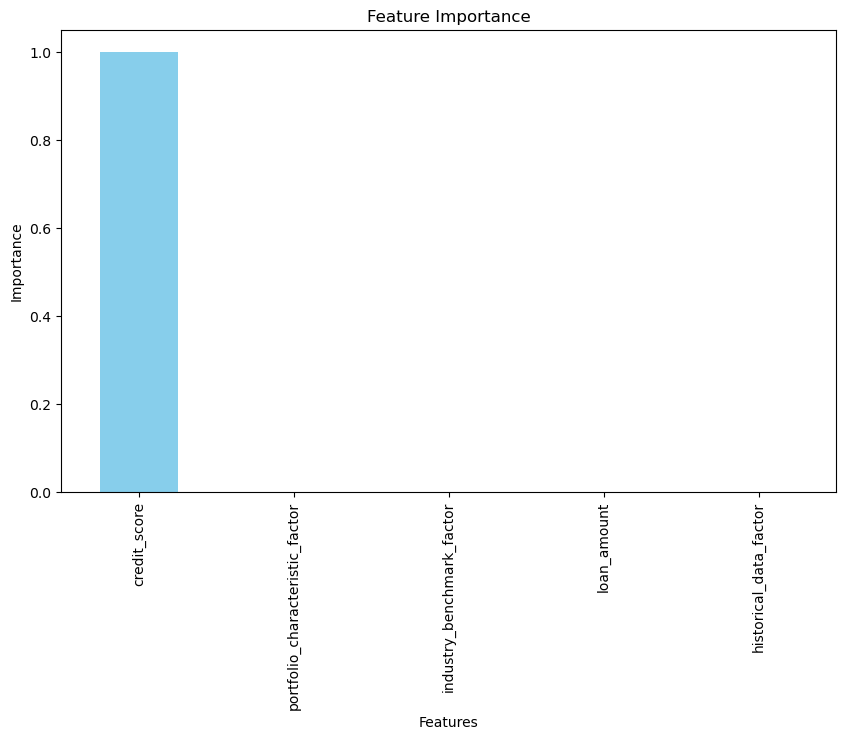

In [9]:

sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
